<a href="https://colab.research.google.com/github/mulerkal/DeepLearning-based-DDoS-detection-/blob/main/CNN_1d_finetuning_binary2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import datetime as dt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
#import joblib  # For scikit-learn versions before 0.23.0
from keras.layers import Dense, Activation, Input, Conv1D, GlobalAveragePooling1D, Dropout ,BatchNormalization, MaxPooling1D
from keras.layers import Conv1D, AveragePooling1D, Flatten, Dense
from keras.models import Sequential, save_model, load_model
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from keras.layers import Add
from keras.models import Model
from sklearn.model_selection import train_test_split
import keras



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Assuming you have a saved model
model = load_model('/content/drive/MyDrive/TransferLearning@FineTuning/1dTransfer_cicids_2018_binary/custom_model_bin3.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#read parquet file in a pandas dataframe
path = '/content/drive/MyDrive/dataset_zipped-20230608T100425Z-005/dataset_zipped/CSE-CIC-2018/cleaning_file/CICIDS2018_preprocessing_binary.parquet'
df = pd.read_parquet(path)
print (df.shape)

(7384563, 67)


from cic_ddos_2019 to cid_ids_2018 50% dataset. Model transfre to the target dataset

In [ ]:
 #Specify the percentage of data to drop (75% in this case)
percentage_to_drop = 0.50

# Generate a boolean mask to select which rows to keep
mask = np.random.rand(len(df)) > percentage_to_drop

# Create a new DataFrame with the selected rows
new_df = df[mask]

# You can also reset the index if needed
new_df.reset_index(drop=True, inplace=True)

# Now 'new_df' contains 25% of your original data

In [ ]:
# One hot encoder
labels = pd.unique(new_df['Label'])
x_columns = new_df.columns.drop('Label')
x = new_df[x_columns].to_numpy()
y = pd.get_dummies(new_df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (3691041, 66)
X shape after PCA application --> (3691041, 58)


In [ ]:
#Split dataframe in train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train.shape, y_train.shape))
print ("X_test --> {} y_test --> {}".format(x_test.shape, y_test.shape))

X_train --> (2583728, 58) y_train --> (2583728, 2)
X_test --> (1107313, 58) y_test --> (1107313, 2)


In [ ]:
#test a model
escore = model.evaluate(x_test, y_test, batch_size=1000)
y_pred = model.predict(x_test)

34604/34604 [==============================] - 68s 2ms/step


In [ ]:
#confusion matrix definition
def confusion_plot(y_test, y_test_pred):

    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(6,4))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', cmap='cividis', xticklabels=labels, yticklabels=labels)
    #sns.heatmap(cf_matrix, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

y_test.shape = (1107313, 2) & y_pred.shape = (1107313, 2)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    961386
           1       0.98      1.00      0.99    145927

    accuracy                           1.00   1107313
   macro avg       0.99      1.00      0.99   1107313
weighted avg       1.00      1.00      1.00   1107313



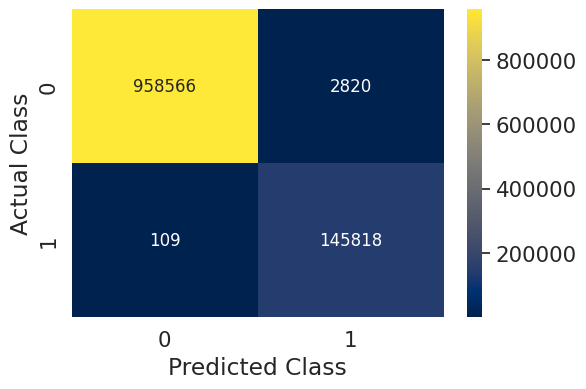

Completed
Accuracy score: 0.9973548581114825
Evaluation score: [0.010011214762926102, 0.9973548650741577]
Recall score: 0.9973548581114825
Precision score: 0.9974010289612674
F1 score: 0.9973651628797702


In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
print (f"y_test.shape = {y_test.shape} & y_pred.shape = {y_pred.shape}")

target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

here binary model classfier from cnn_conv8 from cic_ddos_2019 dataset, which saved in the name of custom_model_bin_9.h5

In [ ]:
# Assuming you have a saved model
model = load_model('/content/drive/MyDrive/TransferLearning@FineTuning/custom_model_bin_9.h5')

In [ ]:
#read parquet file in a pandas dataframe
path = ('/content/drive/MyDrive/df_total_preprocessing_binarized (2).parquet')
df = pd.read_parquet(path)
print (df.shape)

(10491218, 67)


In [ ]:
# One hot encoder
labels = pd.unique(df[' Label'])
x_columns = df.columns.drop(' Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df[' Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (10491218, 66)
X shape after PCA application --> (10491218, 57)


In [ ]:
#Split dataframe in train/test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train1.shape, y_train1.shape))
print ("X_test --> {} y_test --> {}".format(x_test1.shape, y_test1.shape))
#del x,y

X_train --> (5169194, 58) y_train --> (5169194, 2)
X_test --> (2215369, 58) y_test --> (2215369, 2)


In [ ]:
#test a model
escore = model.evaluate(x_test1, y_test1, batch_size=1000)
y_pred = model.predict(x_test1)

69231/69231 [==============================] - 139s 2ms/step


In [ ]:
#confusion matrix definition
def confusion_plot(y_test1, y_test_pred):

    C = confusion_matrix(y_test1, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(6,4))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', cmap='cividis', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1923929
           1       0.98      1.00      0.99    291440

    accuracy                           1.00   2215369
   macro avg       0.99      1.00      0.99   2215369
weighted avg       1.00      1.00      1.00   2215369



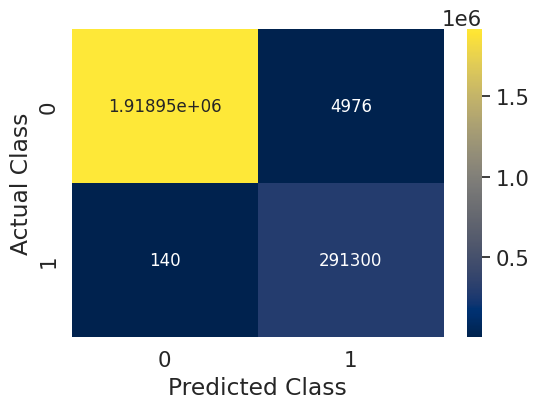

Completed
Accuracy score: 0.9976906781669329
Evaluation score: [0.009216501377522945, 0.9976906776428223]
Recall score: 0.9976906781669329
Precision score: 0.9977271815918725
F1 score: 0.9976987262452134


In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test1,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
#print (f"y_test.shape = {y_test.shape} & y_pred.shape = {y_pred.shape}")

target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

Model transfer from CIC-IDS-2018 dataset to KDDcup99 dataset. The model name is_

In [ ]:
# Assuming you have a saved model
model = load_model('/content/drive/MyDrive/TransferLearning@FineTuning/1dTransfer_cicids_2018_binary/target_model5.h5')

In [ ]:
#read parquet file in a pandas dataframe
path = ('/content/drive/MyDrive/Kddcup99_DDoS/preprocessed_dataset_binary_kdd99_transfer.csv')
df = pd.read_csv(path)
print (df.shape)

(145585, 44)


In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (145585, 43)
X shape after PCA application --> (145585, 36)


In [ ]:
#Split dataframe in train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train.shape, y_train.shape))
print ("X_test --> {} y_test --> {}".format(x_test.shape, y_test.shape))
#del x,y

X_train --> (101909, 36) y_train --> (101909, 2)
X_test --> (43676, 36) y_test --> (43676, 2)


In [ ]:
#test a model
escore = model.evaluate(x_test, y_test, batch_size=1000)
y_pred = model.predict(x_test)

1365/1365 [==============================] - 2s 1ms/step


In [ ]:
#confusion matrix definition
def confusion_plot(y_test, y_test_pred):

    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(6,4))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', cmap='cividis', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26367
           1       1.00      1.00      1.00     17309

    accuracy                           1.00     43676
   macro avg       1.00      1.00      1.00     43676
weighted avg       1.00      1.00      1.00     43676



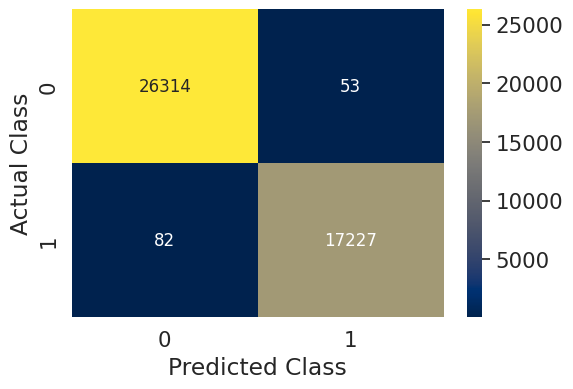

Completed
Accuracy score: 0.9969090576060079
Evaluation score: [0.01183742843568325, 0.9969090819358826]
Recall score: 0.9969090576060079
Precision score: 0.9969090837679325
F1 score: 0.996908611290528


In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
#print (f"y_test.shape = {y_test.shape} & y_pred.shape = {y_pred.shape}")

target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

from 2019 to 2018 50%dataset

In [ ]:
# Assuming you have a saved model
model = load_model('/content/drive/MyDrive/TransferLearning@FineTuning/custom_conv18_2019.h5')

In [ ]:
#read parquet file in a pandas dataframe
path = ('/content/drive/MyDrive/dataset_zipped-20230608T100425Z-005/dataset_zipped/CSE-CIC-2018/cleaning_file/CICIDS2018_preprocessing_binary.parquet')
df = pd.read_parquet(path)
print (df.shape)

(7384563, 67)


In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (7384563, 66)
X shape after PCA application --> (7384563, 58)


In [ ]:
#Split dataframe in train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train.shape, y_train.shape))
print ("X_test --> {} y_test --> {}".format(x_test.shape, y_test.shape))
#del x,y

X_train --> (5169194, 58) y_train --> (5169194, 2)
X_test --> (2215369, 58) y_test --> (2215369, 2)


In [ ]:
#test a model
escore = model.evaluate(x_test, y_test, batch_size=1000)
y_pred = model.predict(x_test)

ValueError: ignored

In [ ]:
#confusion matrix definition
def confusion_plot(y_test, y_test_pred):

    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
#print (f"y_test.shape = {y_test.shape} & y_pred.shape = {y_pred.shape}")

#target_names = ['Begnign', 'Ddos attack']
#print(classification_report(y_test_m, y_pred_m))

#confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

NameError: ignored

Model transferd from cic_ddos_2019 to cic_ids_2018 target dataset 10% of the dataset

In [ ]:
# Assuming you have a saved model
model = load_model('/content/drive/MyDrive/TransferLearning@FineTuning/1dTransfer_cicids_2018_binary/custom_model_bin3.h5')

In [ ]:
#read parquet file in a pandas dataframe
path = '/content/drive/MyDrive/dataset_zipped-20230608T100425Z-005/dataset_zipped/CSE-CIC-2018/cleaning_file/CICIDS2018_preprocessing_binary.parquet'
df = pd.read_parquet(path)
print (df.shape)

(7384563, 67)


from cic_ddos_2019 to cid_ids_2018 50% dataset. Model transfre to the target dataset

In [ ]:
 #Specify the percentage of data to drop (75% in this case)
percentage_to_drop = 0.75

# Generate a boolean mask to select which rows to keep
mask = np.random.rand(len(df)) > percentage_to_drop

# Create a new DataFrame with the selected rows
new_df = df[mask]

# You can also reset the index if needed
new_df.reset_index(drop=True, inplace=True)

# Now 'new_df' contains 25% of your original data

In [ ]:
# One hot encoder
labels = pd.unique(new_df['Label'])
x_columns = new_df.columns.drop('Label')
x1 = new_df[x_columns].to_numpy()
y1 = pd.get_dummies(new_df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x1.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x1 = pca.fit_transform(x1)

print ("X shape after PCA application --> {}".format(x1.shape))

X shape before PCA application --> (1848011, 66)
X shape after PCA application --> (1848011, 58)


In [ ]:
#Split dataframe in train/test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train1.shape, y_train1.shape))
print ("X_test --> {} y_test --> {}".format(x_test1.shape, y_test1.shape))

X_train --> (1293607, 58) y_train --> (1293607, 2)
X_test --> (554404, 58) y_test --> (554404, 2)


In [ ]:
#test a model
escore = model.evaluate(x_test1, y_test1, batch_size=1000)
y_pred = model.predict(x_test1)

17326/17326 [==============================] - 34s 2ms/step


In [ ]:
#confusion matrix definition
def confusion_plot(y_test1, y_test_pred):

    C = confusion_matrix(y_test1, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(6,4))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', cmap='cividis', xticklabels=labels, yticklabels=labels)
    #sns.heatmap(cf_matrix, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

y_test.shape = (554404, 2) & y_pred.shape = (554404, 2)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    481757
           1       0.97      1.00      0.98     72647

    accuracy                           1.00    554404
   macro avg       0.99      1.00      0.99    554404
weighted avg       1.00      1.00      1.00    554404



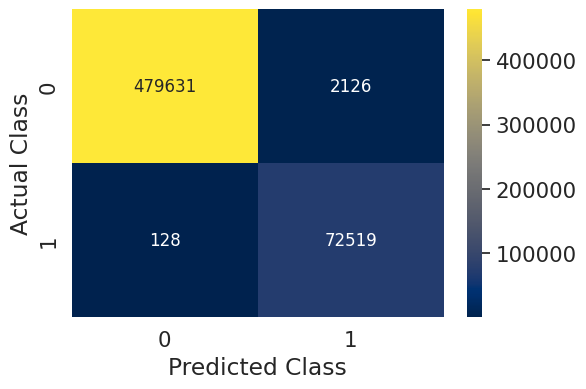

Completed
Accuracy score: 0.9959343727678732
Evaluation score: [0.016205765306949615, 0.9959343671798706]
Recall score: 0.9959343727678732
Precision score: 0.9960360548037149
F1 score: 0.9959577235412865


In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test1,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
print (f"y_test.shape = {y_test1.shape} & y_pred.shape = {y_pred.shape}")

target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

From cic_ddos_2019 data set to the UNSAB15 dataset for binary classfication transfer model

In [ ]:
# Assuming you have a saved model
model = load_model('/content/drive/MyDrive/UNSW-NB15/binary_model_saved')

In [ ]:
#read parquet file in a pandas dataframe
path = '/content/drive/MyDrive/UNSW-NB15/dataset/bin_data.csv'
df1 = pd.read_csv(path)
print (df1.shape)

(81173, 16)


from cic_ddos_2019 to UNSB15 binary classfication

In [ ]:
# One hot encoder
labels = pd.unique(df1['label'])
x_columns = df1.columns.drop('label')
x2 = df1[x_columns].to_numpy()
y2 = pd.get_dummies(df1['label']).to_numpy()
#del df

IndexError: ignored

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x2 = pca.fit_transform(x2)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (81173, 15)
X shape after PCA application --> (81173, 15)


In [ ]:
#Split dataframe in train/test
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train2.shape, y_train2.shape))
print ("X_test --> {} y_test --> {}".format(x_test2.shape, y_test2.shape))

X_train --> (56821, 15) y_train --> (56821, 2)
X_test --> (24352, 15) y_test --> (24352, 2)


In [ ]:
# Define the 1D CNN model
model = keras.Sequential()

# Define hyperparameters
num_filters = 64
kernel_size = 3
num_conv_layers = 18

# Modify the input shape to match the number of features (58)
input_shape = (x_train2.shape[1], 1)

for _ in range(num_conv_layers):
    model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu', padding='same', input_shape=input_shape))

model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # Adjust for number of classes

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define callbacks
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/TransferLearning@FineTuning/custom_conv18_unsw_nb15.h5', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(x_train2, y_train2, epochs=30, batch_size=64, validation_data=(x_test2, y_test2),
                    callbacks=[model_checkpoint, early_stopping])

# Save the model and its weights for later use
model.save('/content/drive/MyDrive/TransferLearning@FineTuning/custom_conv18_unsw_nb15.h5')
model.save_weights('custom_conv4_2019.h5')

# Save the model history and hyperparameters
model_info = {
    'history': history.history,
    'hyperparameters': {
        'epochs': 10,
        'batch_size': 64
        # Add more hyperparameters as needed
    }
}

np.save('/content/drive/MyDrive/TransferLearning@FineTuning/model_info_custom_conv18_unsw_nb15.npy', model_info)

Epoch 1/30
888/888 [==============================] - ETA: 0s - loss: 0.0972 - accuracy: 0.9645
Epoch 1: val_loss improved from inf to 0.05922, saving model to /content/drive/MyDrive/TransferLearning@FineTuning/custom_conv18_unsw_nb15.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


888/888 [==============================] - 15s 11ms/step - loss: 0.0972 - accuracy: 0.9645 - val_loss: 0.0592 - val_accuracy: 0.9868
Epoch 2/30
886/888 [============================>.] - ETA: 0s - loss: 0.0654 - accuracy: 0.9825
Epoch 2: val_loss did not improve from 0.05922
888/888 [==============================] - 9s 10ms/step - loss: 0.0654 - accuracy: 0.9825 - val_loss: 0.0770 - val_accuracy: 0.9801
Epoch 3/30
884/888 [============================>.] - ETA: 0s - loss: 0.0674 - accuracy: 0.9802
Epoch 3: val_loss did not improve from 0.05922
888/888 [==============================] - 10s 11ms/step - loss: 0.0673 - accuracy: 0.9802 - val_loss: 0.0620 - val_accuracy: 0.9808
Epoch 4/30
885/888 [============================>.] - ETA: 0s - loss: 0.0524 - accuracy: 0.9821
Epoch 4: val_loss improved from 0.05922 to 0.04850, saving model to /content/drive/MyDrive/TransferLearning@FineTuning/custom_conv18_unsw_nb15.h5
888/888 [==============================] - 11s 12ms/step - loss: 0.0524 - 

In [ ]:
escore = model.evaluate(x_test2, y_test2, batch_size=1000)
y_pred = model.predict(x_test2)

761/761 [==============================] - 2s 3ms/step


In [ ]:
#confusion matrix definition
def confusion_plot(y_test2, y_test_pred):

    C = confusion_matrix(y_test2, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(6,4))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', cmap='cividis', xticklabels=labels, yticklabels=labels)
    #sns.heatmap(cf_matrix, annot=True, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

y_test.shape = (24352, 2) & y_pred.shape = (24352, 2)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18538
           1       1.00      0.93      0.97      5814

    accuracy                           0.98     24352
   macro avg       0.99      0.97      0.98     24352
weighted avg       0.98      0.98      0.98     24352



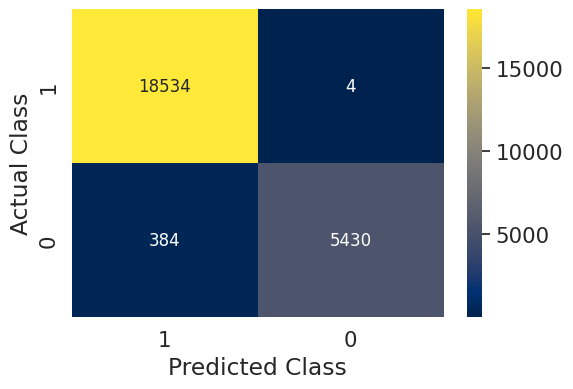

Completed
Accuracy score: 0.9840670170827858
Evaluation score: [0.04093411937355995, 0.9840670228004456]
Recall score: 0.9840670170827858
Precision score: 0.9843722720372642
F1 score: 0.9838787008023616


In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test2,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
print (f"y_test.shape = {y_test2.shape} & y_pred.shape = {y_pred.shape}")

target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
#import keras_tuner as kt
import io, os, math
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Activation, Input, Conv1D, GlobalAveragePooling1D, Dropout ,BatchNormalization, MaxPooling1D
from keras.layers import Conv1D, AveragePooling1D, Flatten, Dense
#import kerastuner as kt
from keras.callbacks import EarlyStopping, History
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from keras.layers import Add
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read parquet file in a pandas dataframe
path = '/content/drive/MyDrive/dataset_zipped-20230608T100425Z-005/dataset_zipped/CSE-CIC-2018/cleaning_file/CICIDS2018_preprocessing_binary.parquet'
df = pd.read_parquet(path)
print (df.shape)

(7384563, 67)


In [ ]:
 #Specify the percentage of data to drop (75% in this case)
percentage_to_drop = 0.75

# Generate a boolean mask to select which rows to keep
mask = np.random.rand(len(df)) > percentage_to_drop

# Create a new DataFrame with the selected rows
new_df = df[mask]

# You can also reset the index if needed
new_df.reset_index(drop=True, inplace=True)

# Now 'new_df' contains 25% of your original data

In [ ]:
# One hot encoder
labels = pd.unique(new_df['Label'])
x_columns = new_df.columns.drop('Label')
x1 = new_df[x_columns].to_numpy()
y1 = pd.get_dummies(new_df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x1.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x1 = pca.fit_transform(x1)

print ("X shape after PCA application --> {}".format(x1.shape))

X shape before PCA application --> (1848393, 66)
X shape after PCA application --> (1848393, 58)


In [ ]:
#Split dataframe in train/test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train1.shape, y_train1.shape))
print ("X_test --> {} y_test --> {}".format(x_test1.shape, y_test1.shape))

X_train --> (1293875, 58) y_train --> (1293875, 2)
X_test --> (554518, 58) y_test --> (554518, 2)


In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (7384563, 66)
X shape after PCA application --> (7384563, 58)


In [ ]:
#Split dataframe in train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train.shape, y_train.shape))
print ("X_test --> {} y_test --> {}".format(x_test.shape, y_test.shape))
#del x,y


X_train --> (5169194, 58) y_train --> (5169194, 2)
X_test --> (2215369, 58) y_test --> (2215369, 2)


In [ ]:
# Define the 1D CNN model
model = keras.Sequential()

# Define hyperparameters
num_filters = 64
kernel_size = 3
num_conv_layers = 8

# Modify the input shape to match the number of features (58)
input_shape = (x_train.shape[1], 1)

for _ in range(num_conv_layers):
    model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu', padding='same', input_shape=input_shape))

model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # Adjust for number of classes

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Create the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 58, 64)            12352     
                                                                 
 conv1d_2 (Conv1D)           (None, 58, 64)            12352     
                                                                 
 conv1d_3 (Conv1D)           (None, 58, 64)            12352     
                                                                 
 conv1d_4 (Conv1D)           (None, 58, 64)            12352     
                                                                 
 conv1d_5 (Conv1D)           (None, 58, 64)            12352     
                                                                 
 conv1d_6 (Conv1D)           (None, 58, 64)            1

In [ ]:
# Define callbacks
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/TransferLearning@FineTuning/custom_model_bin3.h5', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(x_train1, y_train1, epochs=30, batch_size=64, validation_data=(x_test, y_test),
                    callbacks=[model_checkpoint, early_stopping])

# Save the model and its weights for later use
model.save('/content/drive/MyDrive/TransferLearning@FineTuning/custom_model_bin3.h5')
model.save_weights('custom_model_weights.h5')

# Save the model history and hyperparameters
model_info = {
    'history': history.history,
    'hyperparameters': {
        'epochs': 30,
        'batch_size': 64
        # Add more hyperparameters as needed
    }
}

np.save('/content/drive/MyDrive/TransferLearning@FineTuning/model_info_bin3.npy', model_info)

Epoch 1/30
80769/80769 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9936
Epoch 1: val_loss improved from inf to 0.00680, saving model to /content/drive/MyDrive/TransferLearning@FineTuning/custom_model_bin3.h5
80769/80769 [==============================] - 536s 6ms/step - loss: 0.0174 - accuracy: 0.9936 - val_loss: 0.0068 - val_accuracy: 0.9979
Epoch 2/30
   19/80769 [..............................] - ETA: 7:51 - loss: 0.0160 - accuracy: 0.9959

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80762/80769 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9980
Epoch 2: val_loss improved from 0.00680 to 0.00524, saving model to /content/drive/MyDrive/TransferLearning@FineTuning/custom_model_bin3.h5
80769/80769 [==============================] - 516s 6ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0052 - val_accuracy: 0.9983
Epoch 3/30
80767/80769 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9981
Epoch 3: val_loss improved from 0.00524 to 0.00467, saving model to /content/drive/MyDrive/TransferLearning@FineTuning/custom_model_bin3.h5
80769/80769 [==============================] - 514s 6ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 4/30
80761/80769 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9981
Epoch 4: val_loss did not improve from 0.00467
80769/80769 [==============================] - 512s 6ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0

In [ ]:
#confusion matrix definition
def confusion_plot(y_test, y_test_pred):

    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

In [ ]:
escore = model.evaluate(x_test, y_test, batch_size=1000)
y_pred = model.predict(x_test)

69231/69231 [==============================] - 127s 2ms/step


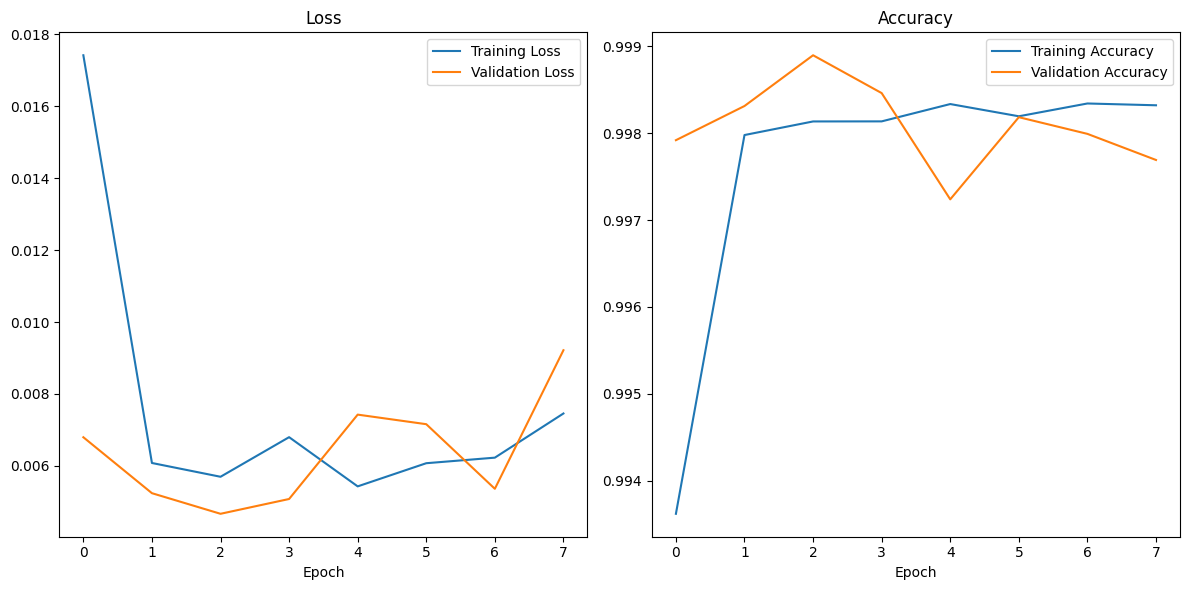

In [ ]:
# Get the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

y_test.shape = (2215369, 2) & y_pred.shape = (2215369, 2)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1923929
           1       0.98      1.00      0.99    291440

    accuracy                           1.00   2215369
   macro avg       0.99      1.00      0.99   2215369
weighted avg       1.00      1.00      1.00   2215369



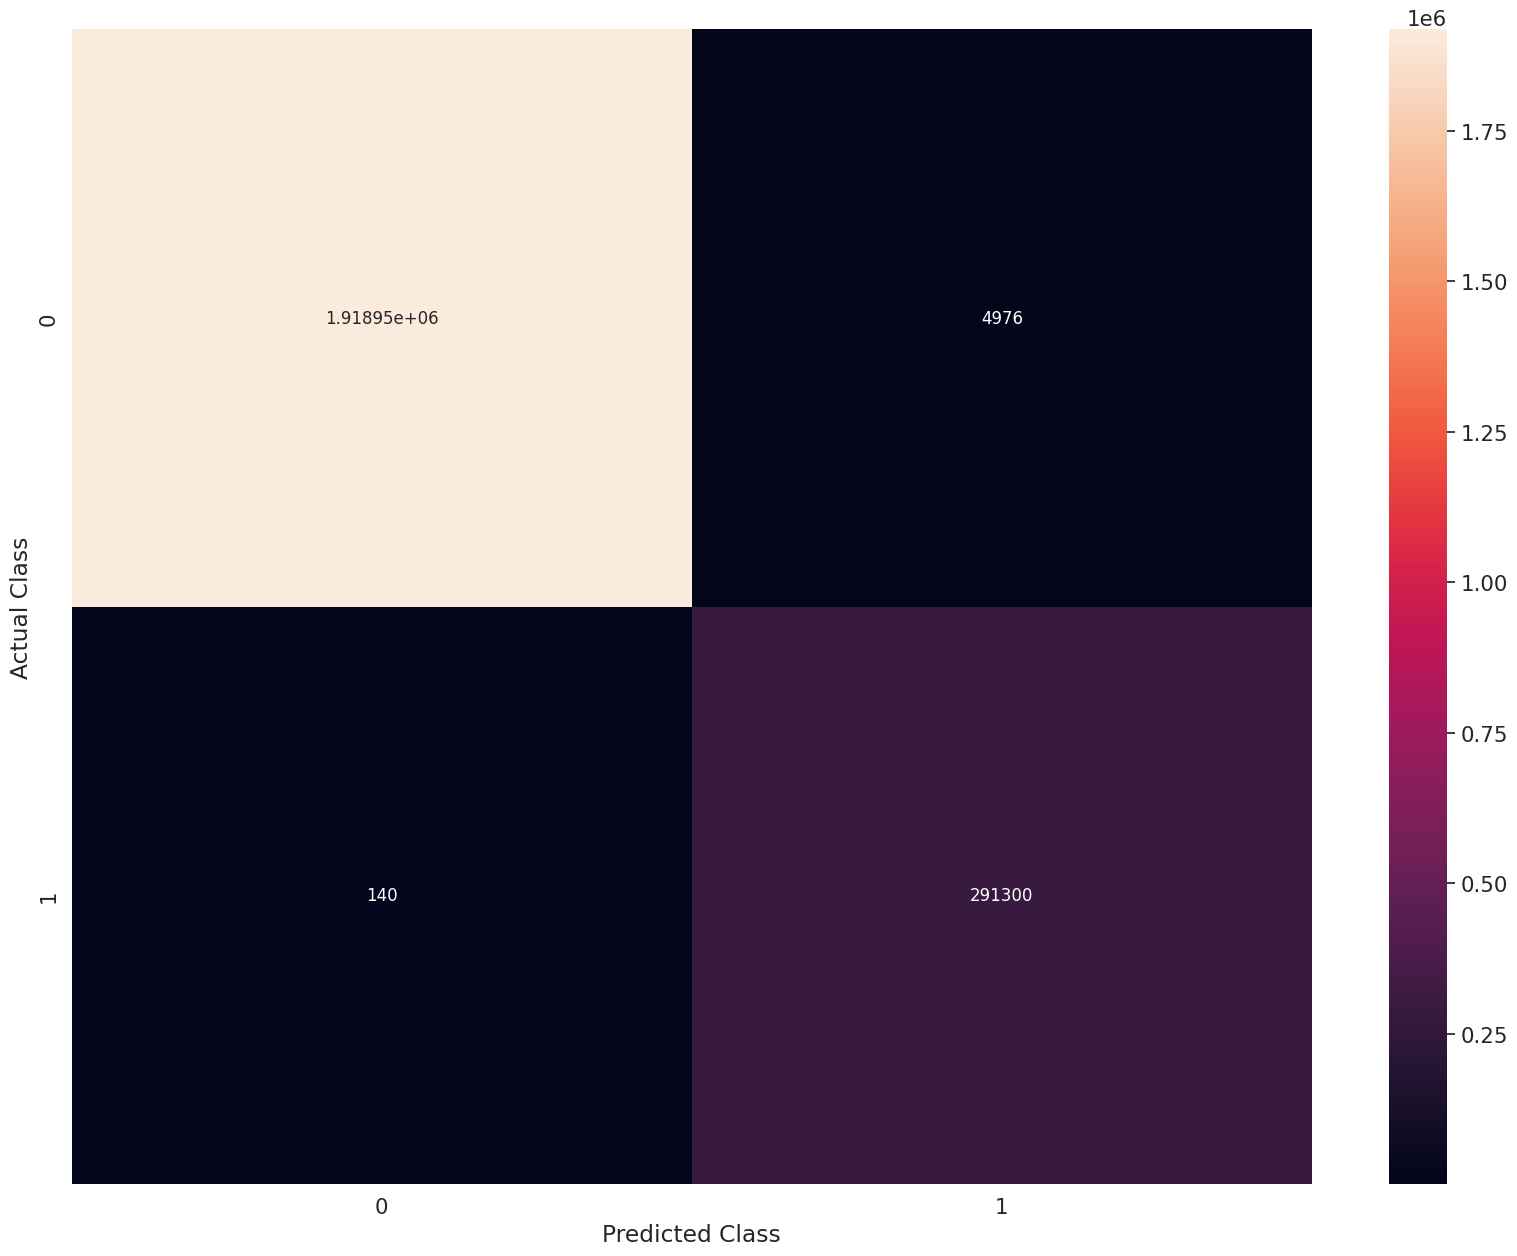

Completed
Accuracy score: 0.9976906781669329
Evaluation score: [0.009216501377522945, 0.9976906776428223]
Recall score: 0.9976906781669329
Precision score: 0.9977271815918725
F1 score: 0.9976987262452134


In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
print (f"y_test.shape = {y_test.shape} & y_pred.shape = {y_pred.shape}")

#target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

Then i want to transfer into ciciids 2019 binary classfication into different datasize for the begining i will use 50% of the dataset to mininzie the traning time, then i will fine tune the model

In [ ]:
# Load the pre-trained model
pretrained_model = keras.models.load_model('/content/drive/MyDrive/UNSW-NB15/TransferLearning /1dTransfer_cic_ddos_UNSB15_binary/csutomunbinaryconv8.h5')
#model = load_model('/content/drive/MyDrive/UNSW-NB15/TransferLearning /1dTransfer_cic_ddos_UNSB15_binary/csutomunbinaryconv8.h5')

In [ ]:
# Assuming x_target is your target dataset with shape (None, 57)
# Add new layers for the target dataset (with 57 features)
target_model = Sequential()
#target_model.add(Dense(64, activation='relu', input_shape=(36,)))
target_model.add(Dense(2, activation='sigmoid'))  # Adjust for your number of classes

In [ ]:
# Freeze the layers from the pre-trained model
for layer in target_model.layers[:-1]:
    layer.trainable = False

In [ ]:
# Compile the target model
target_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


In [ ]:
# Load the target dataset
# Replace 'x_target' and 'y_target' with your new dataset and labels
#read parquet file in a pandas dataframe
path = '/content/drive/MyDrive/Kddcup99_DDoS/preprocessed_dataset_binary_kdd99_transfer.csv'
df = pd.read_csv(path)
print (df.shape)
print(df.head())

(145585, 44)
   duration  src_bytes  dst_bytes  wrong_fragment    urgent      hot  \
0  -0.10785  -0.004293   0.042595       -0.084394 -0.004737 -0.07021   
1  -0.10785  -0.004261  -0.039036       -0.084394 -0.004737 -0.07021   
2  -0.10785  -0.004263  -0.025042       -0.084394 -0.004737 -0.07021   
3  -0.10785  -0.004272  -0.025042       -0.084394 -0.004737 -0.07021   
4  -0.10785  -0.004273  -0.013613       -0.084394 -0.004737 -0.07021   

   num_failed_logins  lnum_compromised  lroot_shell  lsu_attempted  ...  \
0          -0.018022         -0.007905     -0.01944      -0.008613  ...   
1          -0.018022         -0.007905     -0.01944      -0.008613  ...   
2          -0.018022         -0.007905     -0.01944      -0.008613  ...   
3          -0.018022         -0.007905     -0.01944      -0.008613  ...   
4          -0.018022         -0.007905     -0.01944      -0.008613  ...   

   service-0  flag-0  Jan-00  1-Jan  logged_in-0  logged_in-1  \
0          1       1       1      0   

In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
print(df.columns)

Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'lnum_compromised', 'lroot_shell', 'lsu_attempted',
       'lnum_root', 'lnum_file_creations', 'lnum_shells', 'lnum_access_files',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type-0',
       'service-0', 'flag-0', 'Jan-00', '1-Jan', 'logged_in-0', 'logged_in-1',
       'is_host_login-0', 'is_guest_login-0', 'is_guest_login-1', 'Label'],
      dtype='object')


In [ ]:
#Divide features and label
x_columns = df.columns.drop('Label')
x = df[x_columns]
y = pd.get_dummies(df['Label']) # Classification
y = df['Label']
#del df

to use 50% of the data for this fine tuning

In [ ]:
# Specify the percentage of data to drop (75% in this case)
percentage_to_drop = 0.50

# Generate a boolean mask to select which rows to keep
mask = np.random.rand(len(df)) > percentage_to_drop

# Create a new DataFrame with the selected rows
new_df = df[mask]

# You can also reset the index if needed
new_df.reset_index(drop=True, inplace=True)

In [ ]:
#Divide features and label
x_columns = new_df.columns.drop('Label')
x = new_df[x_columns]
y = pd.get_dummies(new_df['Label']) # Classification
y = new_df['Label']
#del df

In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (145585, 43)
X shape after PCA application --> (145585, 36)


In [ ]:
print(df.head())

   Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0       0.938676      0.000006      0.000000         0.000000   
1       0.311390      0.000042      0.000465         0.000219   
2       0.000005      0.000003      0.000000         0.000006   
3       0.938673      0.000006      0.000000         0.000000   
4       0.938674      0.000006      0.000000         0.000000   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0          0.00000         0.000000              0.0          0.000000   
1          0.00008         0.011049              0.0          0.009369   
2          0.00000         0.000993              0.0          0.001936   
3          0.00000         0.000000              0.0          0.000000   
4          0.00000         0.000000              0.0          0.000000   

   Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd Seg Size Min  Active Mean  \
0         0.000000         0.000000  ...          0.000000     0.000000   
1         0.01

In [ ]:
#Split dataframe in train/test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_target_train --> {} y_target_train --> {}".format(x_train1.shape, y_train1.shape))
print ("X_target_test --> {} y_target_test --> {}".format(x_test1.shape, y_test1.shape))
#del x,y

X_target_train --> (101909, 36) y_target_train --> (101909,)
X_target_test --> (43676, 36) y_target_test --> (43676,)


In [ ]:
# Define callbacks for the target model
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/TransferLearning@FineTuning/target_model51.h5', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Fine-tune the target model
history1 = target_model.fit(x_train1, y_train1, epochs=10, batch_size=64, validation_split=0.2,
                            callbacks=[model_checkpoint, early_stopping])

# Save the target model and its weights for later use
model.save('/content/drive/MyDrive/TransferLearning@FineTuning/target_model5.h5')
model.save_weights('/content/drive/MyDrive/TransferLearning@FineTuning/target_model_weights5.h5')

# Save the target model history and hyperparameters
model_info = {
    'history1': history.history,
    'hyperparameters': {
        'epochs': 10,
        'batch_size': 64
        # Add more hyperparameters as needed
    }
}

np.save('/content/drive/MyDrive/TransferLearning@FineTuning/target_model_info5.npy', model_info)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [ ]:
# Create a new model for the target dataset with 57 features in the input layer
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming x_target is your target dataset with shape (None, 57)
# Add new layers for the target dataset (with 57 features)
target_model = Sequential()
target_model.add(Dense(64, activation='relu', input_shape=(57,)))
target_model.add(Dense(2, activation='sigmoid'))  # Adjust for your number of classes

# Freeze the layers from the pre-trained model
for layer in target_model.layers[:-3]:
    layer.trainable = False

# Compile the target model
target_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Split dataframe in train/test for the target dataset
x_target_train, x_target_test, y_target_train, y_target_test = train_test_split(x_target, y_target, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_target_train.shape, y_target_train.shape))
print ("X_test --> {} y_test --> {}".format(x_target_test.shape, y_target_test.shape))

# Define callbacks for the target model
model_checkpoint = ModelCheckpoint('target_model.h5', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Fine-tune the target model
history1 = target_model.fit(x_target_train, y_target_train_one_hot, epochs=10, batch_size=64, validation_split=0.2,
                            callbacks=[model_checkpoint, early_stopping])

# Save the target model and its weights for later use
target_model.save('target_model.h5')
target_model.save_weights('target_model_weights.h5')

# Save the target model history and hyperparameters
model_info = {
    'history': history.history,
    'hyperparameters': {
        'epochs': 10,
        'batch_size': 64
        # Add more hyperparameters as needed
    }
}

np.save('target_model_info.npy', model_info)


X_train --> (513986, 57) y_train --> (513986,)
X_test --> (220280, 57) y_test --> (220280,)
Epoch 1/10
6422/6425 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9904
Epoch 1: val_loss improved from inf to 0.05224, saving model to target_model.h5
6425/6425 [==============================] - 12s 2ms/step - loss: 0.0635 - accuracy: 0.9904 - val_loss: 0.0522 - val_accuracy: 0.9908
Epoch 2/10
6420/6425 [============================>.] - ETA: 0s - loss: 0.0534 - accuracy: 0.9906
Epoch 2: val_loss did not improve from 0.05224
6425/6425 [==============================] - 11s 2ms/step - loss: 0.0534 - accuracy: 0.9906 - val_loss: 0.0524 - val_accuracy: 0.9908
Epoch 3/10
6396/6425 [============================>.] - ETA: 0s - loss: 0.0534 - accuracy: 0.9906
Epoch 3: val_loss did not improve from 0.05224
6425/6425 [==============================] - 10s 2ms/step - loss: 0.0534 - accuracy: 0.9906 - val_loss: 0.0522 - val_accuracy: 0.9908
Epoch 4/10
6400/6425 [================

In [ ]:
#confusion matrix definition
def confusion_plot(x_target_train, y_target_test_pred):

    C = confusion_matrix(y_target_test, y_target_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

In [ ]:
# Assuming you have 2 classes
y_target_test_one_hot = to_categorical(y_target_test, num_classes=2)
escore = target_model.evaluate(x_target_test, y_target_test_one_hot, batch_size=1000)

221/221 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9905


In [ ]:
# Make predictions using your target model on the test set
y_target_test_pred = target_model.predict(x_target_test)

# Assuming you have two classes (adjust as needed)
class_labels = [0, 1]

# Compute the confusion matrix
confusion = confusion_matrix(y_target_test.argmax(axis=1), y_target_test_pred.argmax(axis=1))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


6884/6884 [==============================] - 6s 881us/step


ValueError: ignored

In [ ]:
#print a results

#y_test = y_test.to_numpy().reshape(-1,1)
#y_pred = y_pred.astype(int).reshape(0,1)

target_names = ['Begnign', 'Ddos attack']
print(history1(y_target_test, y_pred.round().astype(int), target_names=target_names))

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_target_test, y_pred.round().astype(int))
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

vscore = accuracy_score(y_target_test, y_pred.round().astype(int))
rscore = recall_score(y_target_test, y_pred.round().astype(int), average='weighted')
ascore = precision_score(y_target_test, y_pred.round().astype(int), average='weighted')
f1score= f1_score(y_target_test, y_pred.round().astype(int), average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

TypeError: ignored

In [ ]:
def custom_cnn1d_binary(input_shape=(57, 1), num_classes=2):
    def residual_block(x, filters, stride, kernel_size=3):
        # Shortcut
        shortcut = x
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)

        # Main path
        x = Conv1D(filters, kernel_size, strides=stride, padding='same')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv1D(filters, kernel_size, padding='same')(x)
        x = BatchNormalization()(x)

        # Add shortcut to the main path
        x = Add()([x, shortcut])
        x = Activation('relu')(x)
        return x

    input_data = Input(shape=input_shape)

    # Initial Conv Layer
    x = Conv1D(64, 7, strides=2, padding='same')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling1D(3, strides=2, padding='same')(x)

    # Residual Blocks
    num_blocks_list = [2, 2, 2, 2]
    filters_list = [64, 128, 256, 512]

    for stage in range(4):
        num_blocks = num_blocks_list[stage]
        filters = filters_list[stage]

        for block in range(num_blocks):
            stride = 1 if stage == 0 and block == 0 else 2
            x = residual_block(x, filters, stride)

    # Global Average Pooling Layer
    x = GlobalAveragePooling1D()(x)

    # Fully Connected Layer
    x = Dense(256, activation='relu')(x)

    # Output Layer
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(input_data, output)

    return model

model = custom_cnn1d_binary(input_shape=(66, 1), num_classes=8)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Create the model.
model = custom_cnn1d_binary()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 57, 1)]              0         []                            
                                                                                                  
 conv1d_50 (Conv1D)          (None, 29, 64)               512       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_34 (Ba  (None, 29, 64)               256       ['conv1d_50[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_34 (Activation)  (None, 29, 64)               0         ['batch_normalization_34

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
model_checkpoint = ModelCheckpoint('custom_cnn1d_binary.h5', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[model_checkpoint, early_stopping])

# Save the model history and hyperparameters
model_info = {
    'history': history.history,
    'hyperparameters': {
        'epochs': 10,
        'batch_size': 64
        # Add more hyperparameters as needed
    }
}

np.save('model_info.npy', model_info)

Epoch 1/10
114748/114748 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9987
Epoch 1: val_loss improved from inf to 0.00211, saving model to custom_cnn1d_binary.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


114748/114748 [==============================] - 3303s 29ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0021 - val_accuracy: 0.9993
Epoch 2/10
114748/114748 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9987
Epoch 2: val_loss did not improve from 0.00211
114748/114748 [==============================] - 3192s 28ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0022 - val_accuracy: 0.9991
Epoch 3/10
114747/114748 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9986
Epoch 3: val_loss did not improve from 0.00211
114748/114748 [==============================] - 3070s 27ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0038 - val_accuracy: 0.9988
Epoch 4/10
 40673/114748 [=========>....................] - ETA: 28:03 - loss: 0.0032 - accuracy: 0.9992

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 58, 16)            64        
                                                                 
 conv1d_4 (Conv1D)           (None, 58, 48)            2352      
                                                                 
 conv1d_5 (Conv1D)           (None, 58, 48)            6960      
                                                                 
 global_average_pooling1d_1   (None, 48)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 32)                1568      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                      

In [ ]:
#confusion matrix definition
def confusion_plot(y_test, y_test_pred):

    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

In [ ]:
#test a model
escore = model.evaluate(x_test, y_test, batch_size=1000)
y_pred = model.predict(x_test)

69231/69231 [==============================] - 302s 4ms/step


In [ ]:
# Get the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

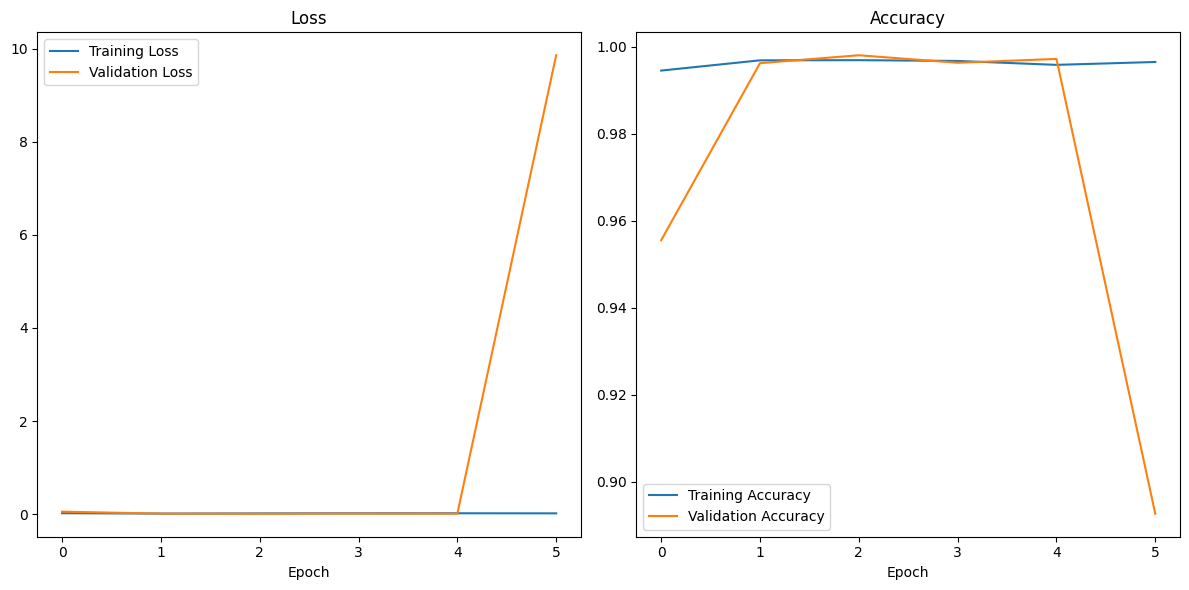

In [ ]:

# Get the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the training loss and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pip install plotly

In [ ]:

import plotly.graph_objects as go
import plotly.express as px

# Create a figure for training and validation loss
loss_figure = go.Figure()

loss_figure.add_trace(go.Scatter(x=history.epoch, y=history.history['loss'], mode='lines', name='Training Loss'))
loss_figure.add_trace(go.Scatter(x=history.epoch, y=history.history['val_loss'], mode='lines', name='Validation Loss'))

loss_figure.update_layout(
    title='Loss Over Epochs',
    xaxis_title='Epoch',
    yaxis_title='Loss',
)

# Create a figure for training and validation accuracy
accuracy_figure = go.Figure()

accuracy_figure.add_trace(go.Scatter(x=history.epoch, y=history.history['accuracy'], mode='lines', name='Training Accuracy'))
accuracy_figure.add_trace(go.Scatter(x=history.epoch, y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy'))

accuracy_figure.update_layout(
    title='Accuracy Over Epochs',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
)

# Show interactive plots
loss_figure.show()
accuracy_figure.show()

In [ ]:
'''
print (f"y_test_0 = {y_test[134]}")
print (f"y_pred_0 = {y_pred[134]}")

print (f"y_test_m0 = {np.argmax(y_test,axis=1)}")
print (f"y_pred_m0 = {np.argmax(y_pred,axis=1)}")

#y_test_m = np.argmax(y_test[0],axis=1)
#y_pred_m = np.argmax(y_pred[0],axis=1)
'''

'\nprint (f"y_test_0 = {y_test[134]}")\nprint (f"y_pred_0 = {y_pred[134]}")\n\nprint (f"y_test_m0 = {np.argmax(y_test,axis=1)}")\nprint (f"y_pred_m0 = {np.argmax(y_pred,axis=1)}")\n\n#y_test_m = np.argmax(y_test[0],axis=1)\n#y_pred_m = np.argmax(y_pred[0],axis=1)\n'

y_test.shape = (2215369, 8) & y_pred.shape = (2215369, 8)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1923929
           1       0.99      1.00      0.99     59656
           2       0.69      0.99      0.81       513
           3       0.99      0.99      0.99    172670
           4       0.97      0.88      0.93     12295
           5       0.94      0.98      0.96     43402
           6       0.00      0.00      0.00        20
           7       0.98      0.71      0.82      2884

    accuracy                           1.00   2215369
   macro avg       0.82      0.82      0.81   2215369
weighted avg       1.00      1.00      1.00   2215369



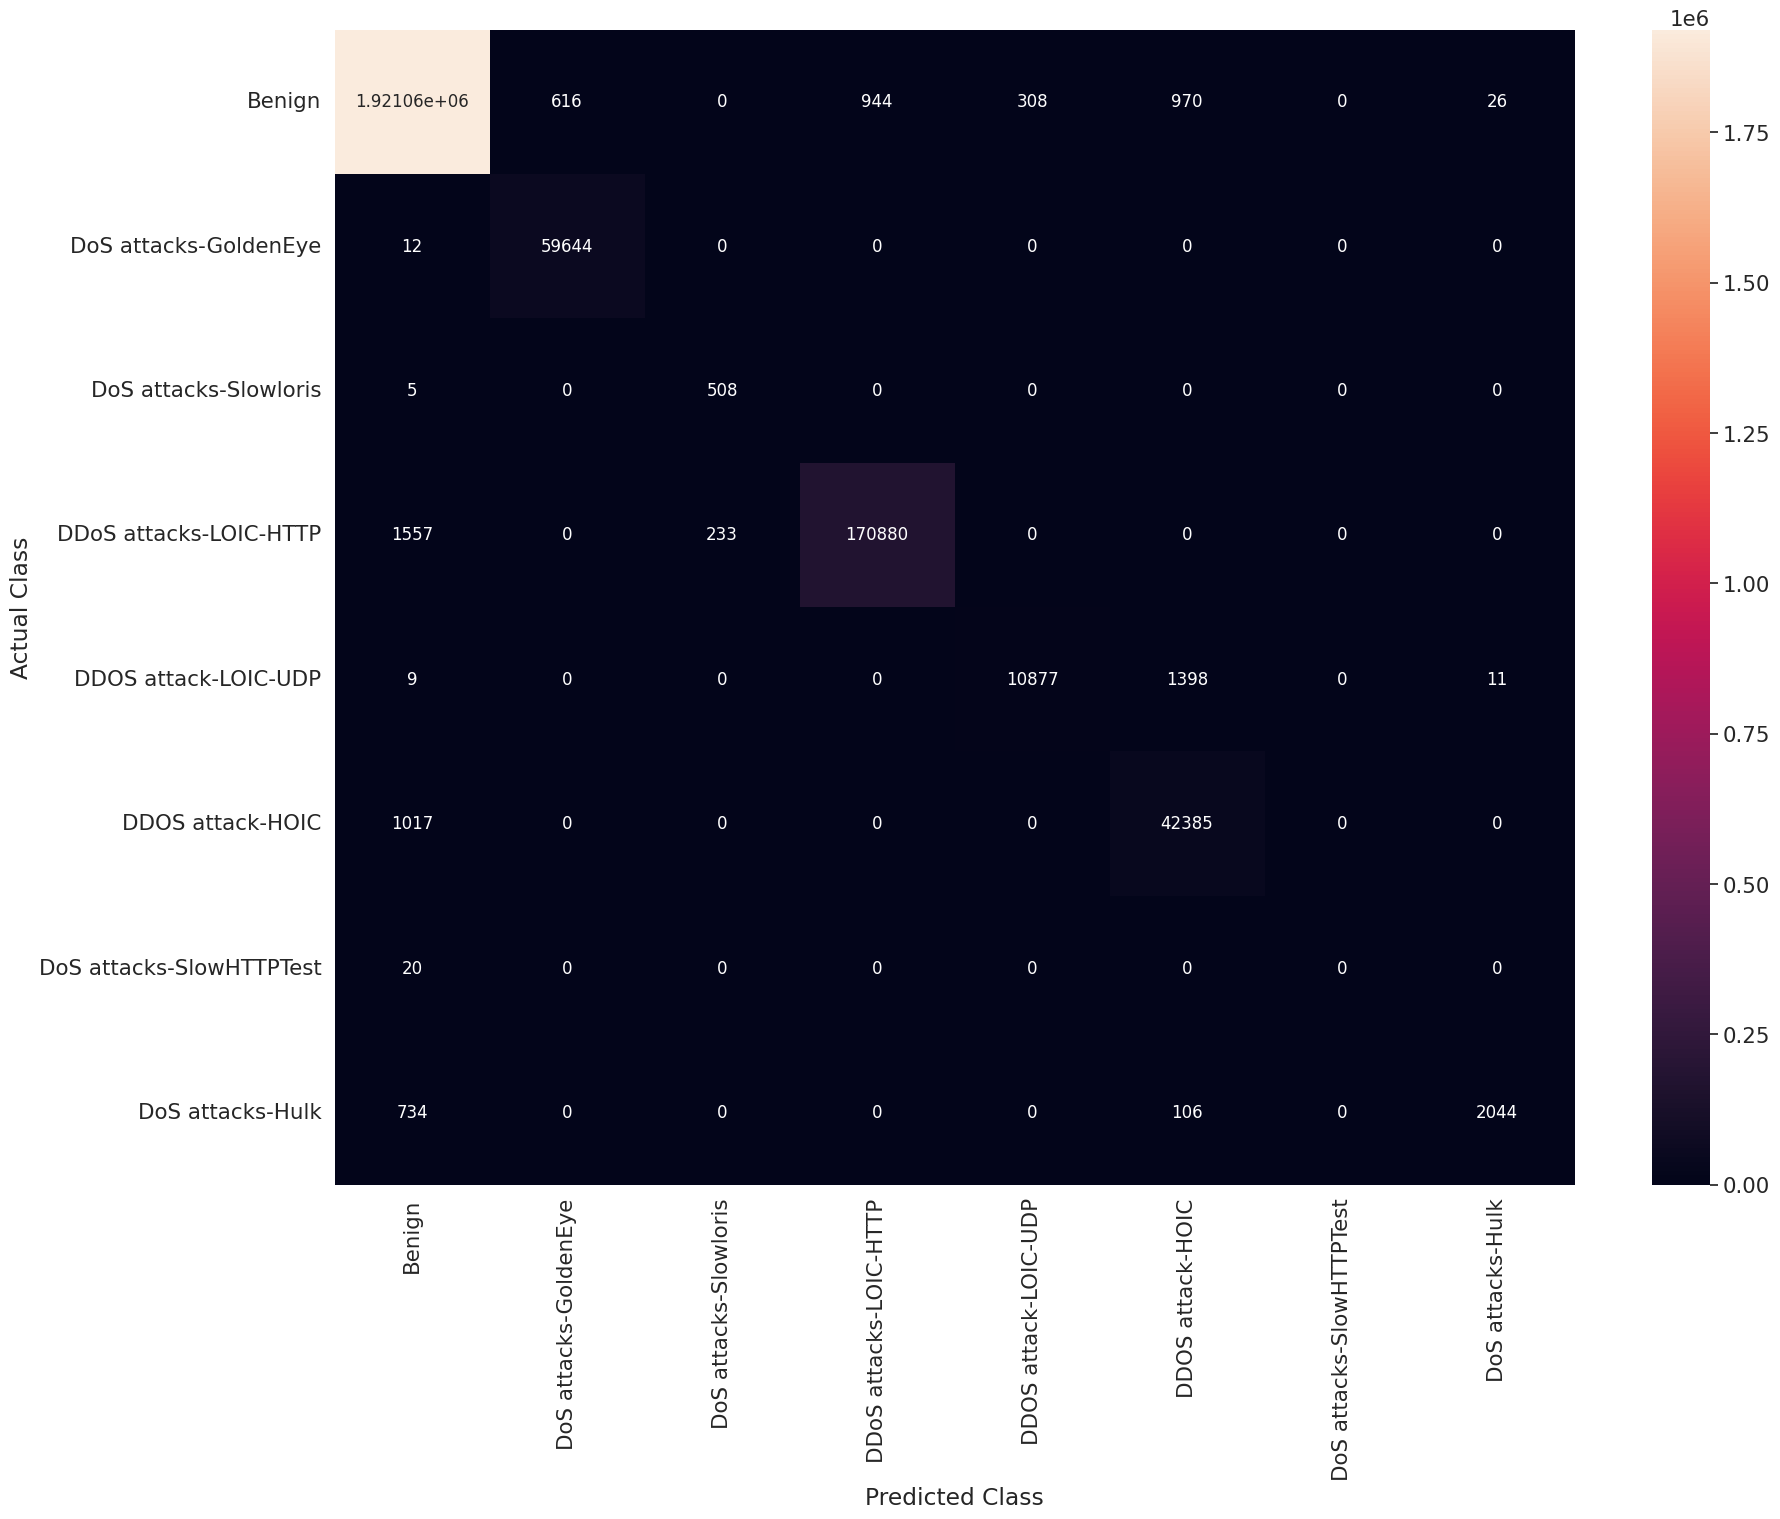

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed
Accuracy score: 0.9964042107657911
Evaluation score: [0.014297966845333576, 0.996404230594635]
Recall score: 0.9964042107657911
Precision score: 0.9964446482259581
F1 score: 0.9963714189288072


In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
print (f"y_test.shape = {y_test.shape} & y_pred.shape = {y_pred.shape}")

#target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

y_test.shape = (2215369, 8) & y_pred.shape = (2215369, 8)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94   1923929
           1       0.73      0.00      0.00     59656
           2       0.00      0.00      0.00       513
           3       1.00      0.06      0.12    172670
           4       0.57      0.45      0.50     12295
           5       0.98      0.82      0.89     43402
           6       0.00      0.00      0.00        20
           7       0.55      0.69      0.61      2884

    accuracy                           0.89   2215369
   macro avg       0.59      0.38      0.38   2215369
weighted avg       0.90      0.89      0.85   2215369



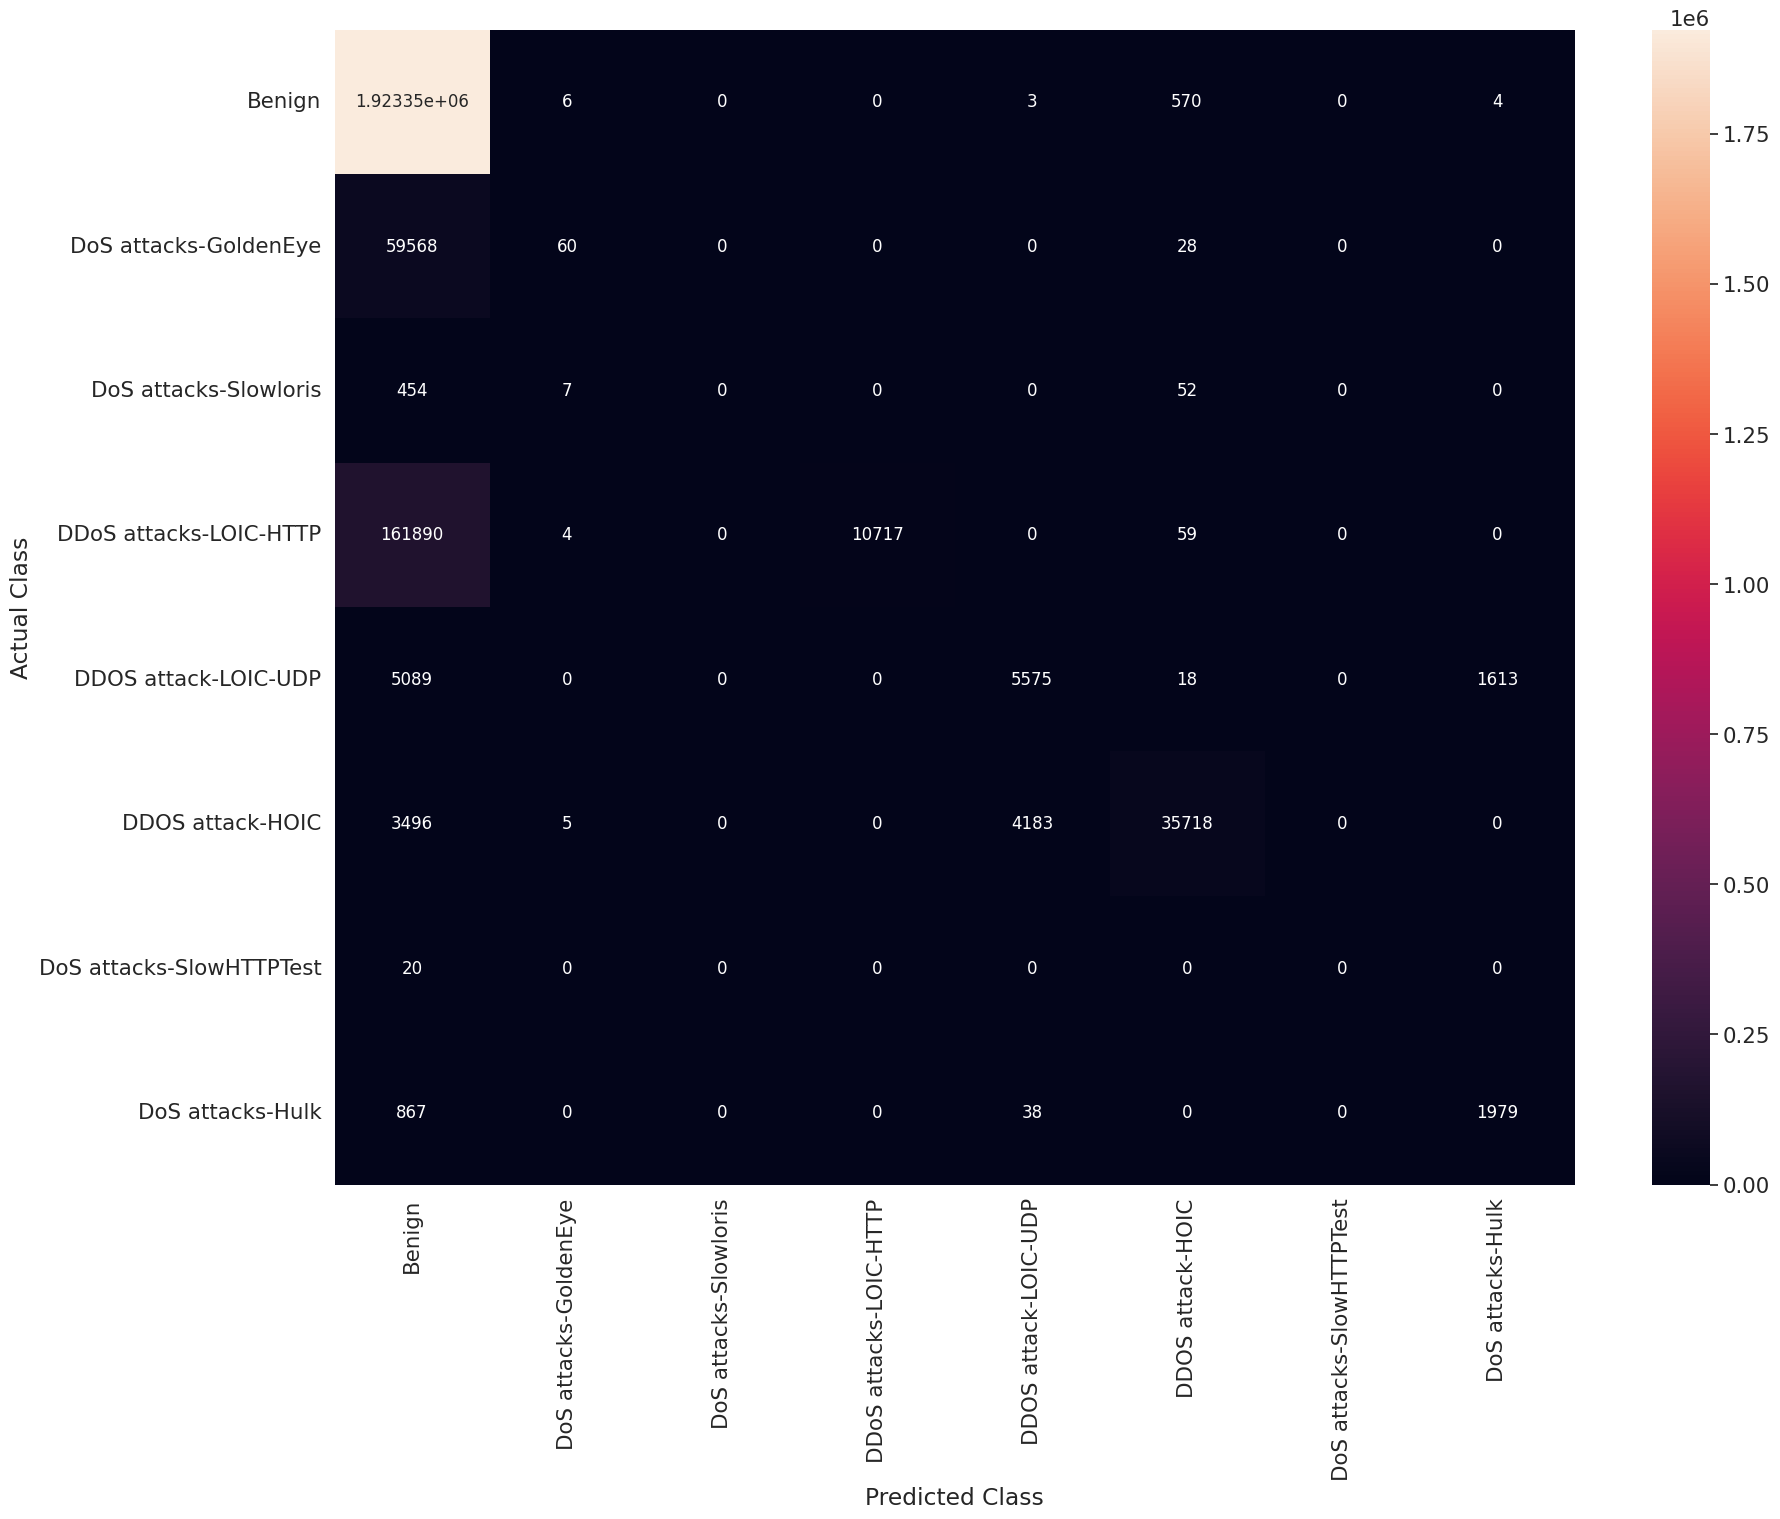

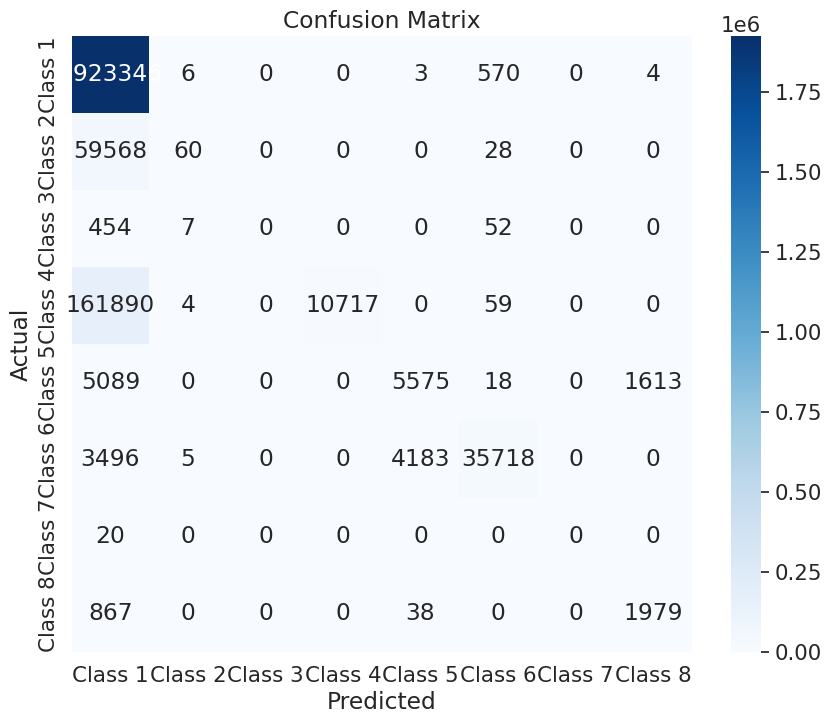

In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Define class labels (replace with your actual class labels)
#class_labels = ["Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8"]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Adjust font size as needed
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('resnet18_custom_model.keras')

In [ ]:
# Load the pre-trained model (your custom ResNet-like model)
from keras.models import load_model
model = load_model('resnet18_custom_model.keras')


In [ ]:
# Modify the output layer for the target dataset
num_classes = 12  # Number of classes in the target dataset
output_layer = Dense(num_classes, activation='softmax')(model.layers[-2].output)


In [ ]:
fine_tuned_model = Model(inputs=model.input, outputs=output_layer)
for layer in fine_tuned_model.layers:
#     layer.trainable = False


In [ ]:
fine_tuned_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess your target dataset
# You will need to define data loading and preprocessing steps specific to your dataset.

In [ ]:
#read parquet file in a pandas dataframe
path = '/content/drive/MyDrive/TransferLearning@FineTuning/CNN_Transsfer/CIC-DDoS-2019/CIC_DDOS_2019(prePro).csv'
df = pd.read_csv(path)
print (df.shape)

(313491, 78)


In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
fine_tuned_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess your target dataset
# You will need to define data loading and preprocessing steps specific to your dataset.

In [ ]:
#read parquet file in a pandas dataframe
path = '/content/drive/MyDrive/TransferLearning@FineTuning/CNN_Transsfer/CIC-DDoS-2019/CIC_DDOS_2019(prePro).csv'
df = pd.read_csv(path)
print (df.shape)

(313491, 78)


In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (313491, 77)


ValueError: ignored

In [ ]:
#Split dataframe in train/test
x_target_train, x_target_test, y_target_train, y_target_test = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_target_train --> {} y_target_train --> {}".format(x_target_train.shape, y_target_train.shape))
print ("X_target_test --> {} y_target_test --> {}".format(x_target_test.shape, y_target_test.shape))
#del x,y


X_target_train --> (219443, 77) y_target_train --> (219443, 12)
X_target_test --> (94048, 77) y_target_test --> (94048, 12)


In [ ]:
fine_tuned_model = custom_resnet(input_shape=(77, 1), num_classes=12)

In [ ]:
# Train the model on the target dataset
#fine_tuned_model.fit(target_dataset, epochs=10, batch_size=32, validation_data=validation_dataset)
history= fine_tuned_model.fit(x_target_train, y_target_train,  # Provide your new dataset and labels
                    epochs=10, batch_size=64, validation_data=(x_target_test, y_target_test))

Epoch 1/10
3429/3429 [==============================] - 105s 27ms/step - loss: 0.5053 - accuracy: 0.8433 - val_loss: 1.3222 - val_accuracy: 0.6978
Epoch 2/10
3429/3429 [==============================] - 90s 26ms/step - loss: 0.3189 - accuracy: 0.8958 - val_loss: 2.4097 - val_accuracy: 0.3561
Epoch 3/10
3429/3429 [==============================] - 89s 26ms/step - loss: 0.2619 - accuracy: 0.9104 - val_loss: 2.0155 - val_accuracy: 0.5771
Epoch 4/10
3429/3429 [==============================] - 89s 26ms/step - loss: 0.2208 - accuracy: 0.9233 - val_loss: 3.6633 - val_accuracy: 0.3290
Epoch 5/10
3429/3429 [==============================] - 89s 26ms/step - loss: 0.1982 - accuracy: 0.9313 - val_loss: 3.4933 - val_accuracy: 0.3085
Epoch 6/10
3429/3429 [==============================] - 89s 26ms/step - loss: 0.1853 - accuracy: 0.9341 - val_loss: 2.7582 - val_accuracy: 0.2915
Epoch 7/10
3429/3429 [==============================] - 88s 26ms/step - loss: 0.1769 - accuracy: 0.9370 - val_loss: 4.1756 

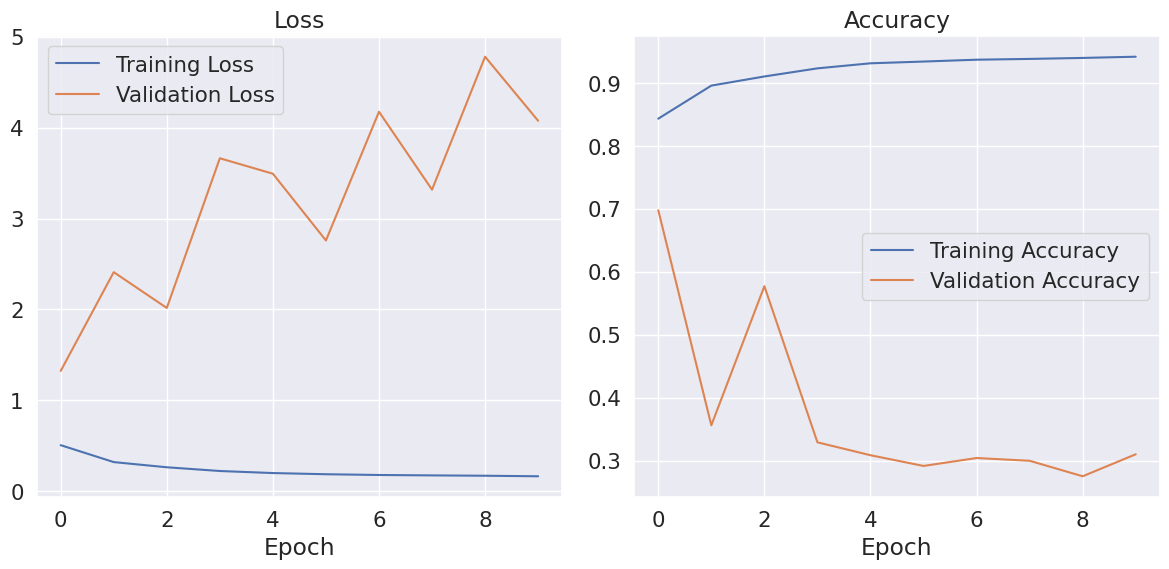

In [ ]:
# Retrieve training history.
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-55-6cdbc39337aa>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Set the style to a grid with a dark background


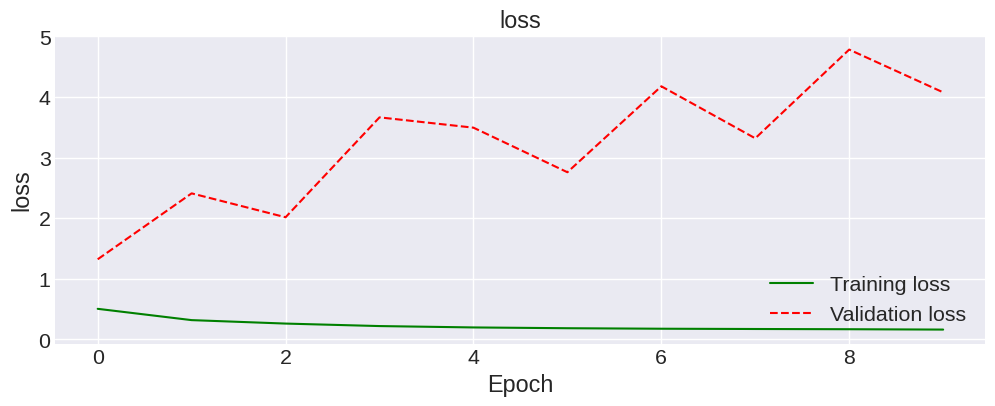

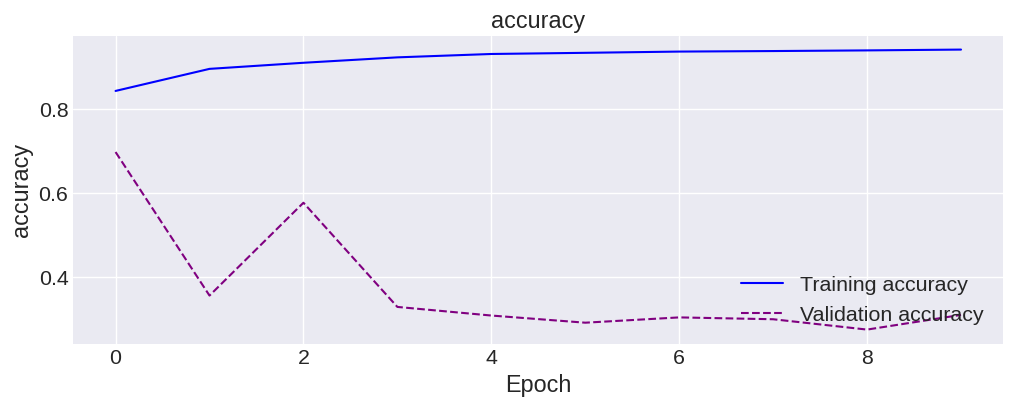

In [ ]:
# Custom plot function
def plot_results(history, metric_name, train_color, val_color):
    plt.figure(figsize=(12, 4))
    plt.plot(history.history[metric_name], label='Training ' + metric_name, color=train_color)
    plt.plot(history.history['val_' + metric_name], label='Validation ' + metric_name, linestyle='dashed', color=val_color)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.title(metric_name)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

# Plot training history with different colors for training and validation
plt.style.use('seaborn-darkgrid')  # Set the style to a grid with a dark background
plot_results(history, 'loss', 'green', 'red')  # Training loss in green, validation loss in red
plot_results(history, 'accuracy', 'blue', 'purple')  # Training accuracy in blue, validation accuracy in purple


In [ ]:
#test a model
escore = fine_tuned_model.evaluate(x_target_test, y_target_test, batch_size=64)
y_pred = fine_tuned_model.predict(x_target_test)

2939/2939 [==============================] - 13s 5ms/step


y_test.shape = (94048, 12) & y_pred.shape = (94048, 12)
              precision    recall  f1-score   support

           0       0.25      1.00      0.40     18922
           1       0.22      0.03      0.05      1614
           2       0.24      0.29      0.27       835
           3       0.00      0.00      0.00       986
           4       0.34      0.07      0.12      4414
           5       0.86      0.25      0.39     20708
           6       0.00      0.00      0.00       284
           7       0.00      0.00      0.00        98
           8       0.83      0.67      0.74      9696
           9       0.97      0.05      0.10     29737
          10       0.70      0.08      0.15      6737
          11       0.00      0.00      0.00        17

    accuracy                           0.35     94048
   macro avg       0.37      0.20      0.18     94048
weighted avg       0.70      0.35      0.29     94048



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


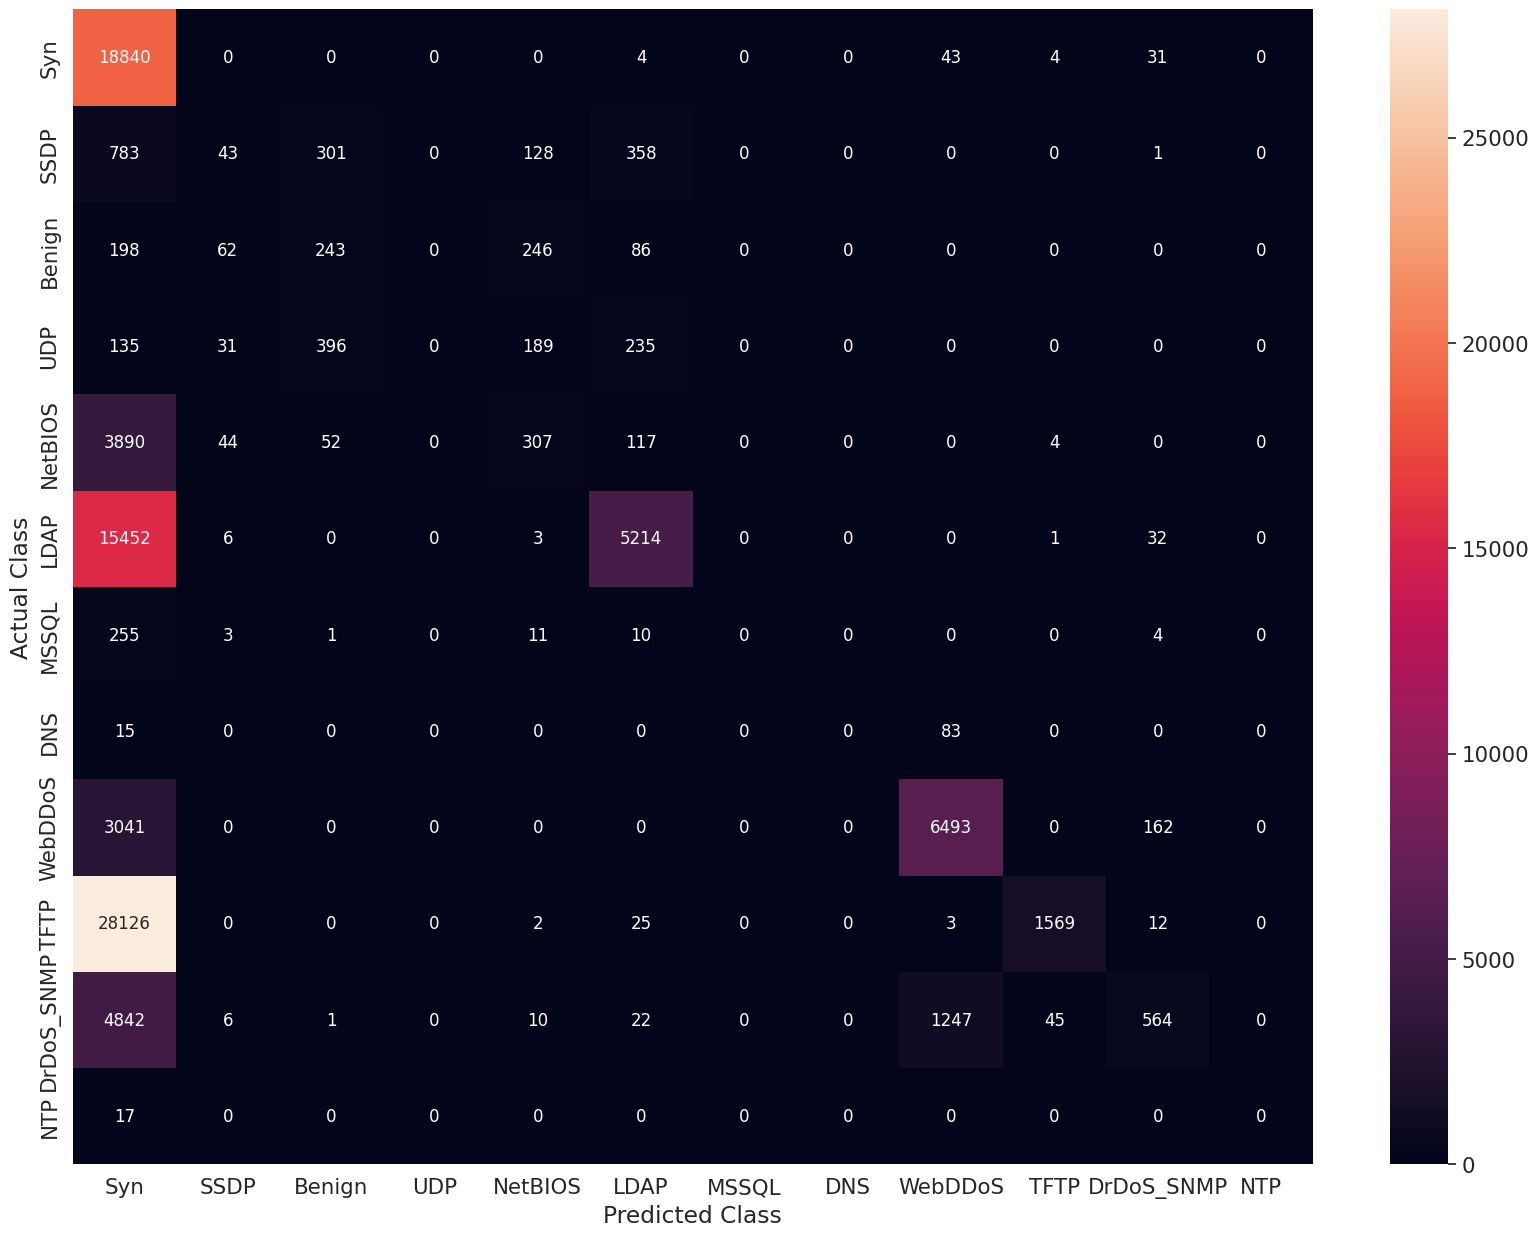

Completed
Accuracy score: 0.3537874276964954
Evaluation score: [3.0443296432495117, 0.3537874221801758]
Recall score: 0.3537874276964954
Precision score: 0.7021460399493942
F1 score: 0.2931249437858319


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test_m = np.argmax(y_target_test,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
print (f"y_test.shape = {y_target_test.shape} & y_pred.shape = {y_pred.shape}")

#target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)

In [ ]:
# Load the pre-trained model (your custom ResNet-like model)
from keras.models import load_model
model = load_model('resnet18_custom_model.keras')


In [ ]:
# Modify the output layer for the target dataset
num_classes = 19  # Number of classes in the target dataset
output_layer = Dense(num_classes, activation='softmax')(model.layers[-2].output)


In [ ]:
fine_tuned_model1 = Model(inputs=model.input, outputs=output_layer)
for layer in fine_tuned_model.layers:
     layer.trainable = False


In [ ]:
#read parquet file in a pandas dataframe
path = '/content/drive/MyDrive/df_total_preprocessing_no_OHE.parquet'
df = pd.read_parquet(path)
print (df.shape)

(10491218, 67)


In [ ]:
# One hot encoder
labels = pd.unique(df[' Label'])
x_columns = df.columns.drop(' Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df[' Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (10491218, 66)
X shape after PCA application --> (10491218, 57)


In [ ]:
#Split dataframe in train/test
x_target1_train, x_target1_test, y_target1_train, y_target1_test = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_target1_train --> {} y_target1_train --> {}".format(x_target1_train.shape, y_target1_train.shape))
print ("X_target1_test --> {} y_target1_test --> {}".format(x_target1_test.shape, y_target1_test.shape))
#del x,y


X_target1_train --> (7343852, 57) y_target1_train --> (7343852, 19)
X_target1_test --> (3147366, 57) y_target1_test --> (3147366, 19)


In [ ]:
fine_tuned_model1 = custom_resnet(input_shape=(57, 1), num_classes=19)

In [ ]:
fine_tuned_model1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load and preprocess your target dataset
# You will need to define data loading and preprocessing steps specific to your dataset.

In [ ]:
# Train the model on the target dataset
#fine_tuned_model.fit(target_dataset, epochs=10, batch_size=32, validation_data=validation_dataset)
history= fine_tuned_model1.fit(x_target1_train, y_target1_train,  # Provide your new dataset and labels
                    epochs=10, batch_size=64, validation_data=(x_target1_test, y_target1_test))

NameError: ignored

In [ ]:
/content/drive/MyDrive/UNSW-NB15/binary_model_saved

In [ ]:
# Assuming you have a saved model
model = load_model('/content/drive/MyDrive/TransferLearning@FineTuning/1dTransfer_cicids_2018_binary//content/drive/MyDrive/UNSW-NB15/binary_model_saved.h5')

In [ ]:
#read parquet file in a pandas dataframe
path = ('/content/drive/MyDrive/Kddcup99_DDoS/preprocessed_dataset_binary_kdd99_transfer.csv')
df = pd.read_csv(path)
print (df.shape)

(145585, 44)


In [ ]:
# One hot encoder
labels = pd.unique(df['Label'])
x_columns = df.columns.drop('Label')
x = df[x_columns].to_numpy()
y = pd.get_dummies(df['Label']).to_numpy()
#del df

In [ ]:
#apply PCA reduction
print ("X shape before PCA application --> {}".format(x.shape))

pca = PCA(n_components="mle") #Minka’s MLE is used to guess the dimension
x = pca.fit_transform(x)

print ("X shape after PCA application --> {}".format(x.shape))

X shape before PCA application --> (145585, 43)
X shape after PCA application --> (145585, 36)


In [ ]:
#Split dataframe in train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print ("X_train --> {} y_train --> {}".format(x_train.shape, y_train.shape))
print ("X_test --> {} y_test --> {}".format(x_test.shape, y_test.shape))
#del x,y

X_train --> (101909, 36) y_train --> (101909, 2)
X_test --> (43676, 36) y_test --> (43676, 2)


In [ ]:
#test a model
escore = model.evaluate(x_test, y_test, batch_size=1000)
y_pred = model.predict(x_test)

1365/1365 [==============================] - 2s 1ms/step


In [ ]:
#confusion matrix definition
def confusion_plot(y_test, y_test_pred):

    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    plt.figure(figsize=(6,4))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', cmap='cividis', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')

    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26367
           1       1.00      1.00      1.00     17309

    accuracy                           1.00     43676
   macro avg       1.00      1.00      1.00     43676
weighted avg       1.00      1.00      1.00     43676



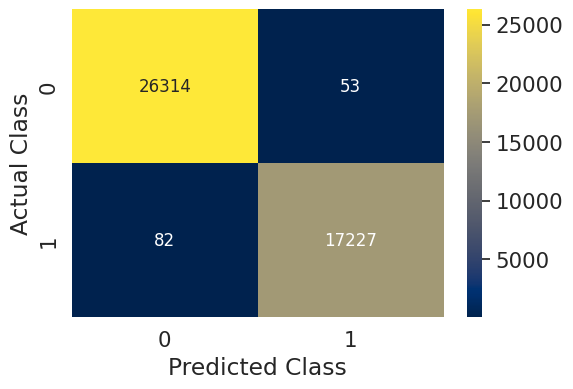

Completed
Accuracy score: 0.9969090576060079
Evaluation score: [0.01183742843568325, 0.9969090819358826]
Recall score: 0.9969090576060079
Precision score: 0.9969090837679325
F1 score: 0.996908611290528


In [ ]:
#print a results
#print a results
y_test_m = np.argmax(y_test,axis=1)
y_pred_m = np.argmax(y_pred,axis=1)
#print (f"y_test.shape = {y_test.shape} & y_pred.shape = {y_pred.shape}")

target_names = ['Begnign', 'Ddos attack']
print(classification_report(y_test_m, y_pred_m))

confusion_plot(y_test_m, y_pred_m)

vscore = accuracy_score(y_test_m,y_pred_m)
rscore = recall_score(y_test_m, y_pred_m, average='weighted')
ascore = precision_score(y_test_m, y_pred_m, average='weighted')
f1score= f1_score(y_test_m, y_pred_m, average='weighted')

print('Completed')
print('='*50)
print("Accuracy score: {}".format(vscore))
print('='*50)
print("Evaluation score: {}".format(escore))
print('='*50)
print("Recall score: {}".format(rscore))
print('='*50)
print("Precision score: {}".format(ascore))
print('='*50)
print("F1 score: {}".format(f1score))
print('='*50)